Import libraries

In [18]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [2]:
file_path = '/content/Online Retail.xlsx'
df = pd.read_excel(file_path)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Data Preprocessing

In [16]:
df = df.dropna()
X = df[['Quantity', 'UnitPrice']]
X = StandardScaler().fit_transform(X)

Visualize the Elbow Method for KMeans

KMeans Elbow Method Visualization:


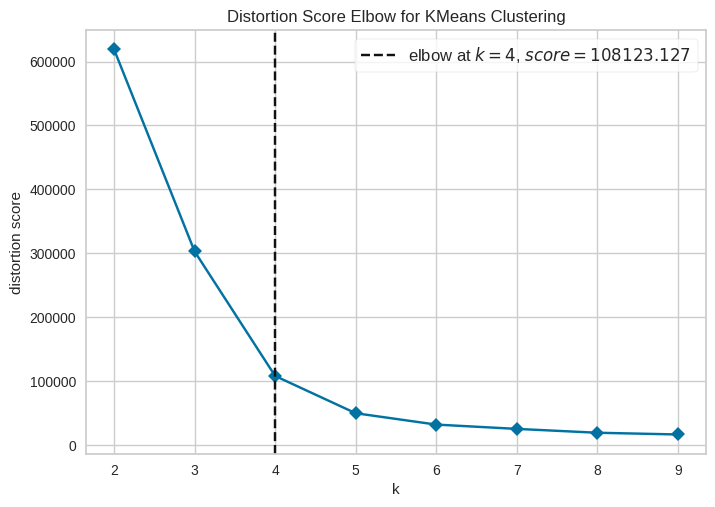

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
print("KMeans Elbow Method Visualization:")
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

In [20]:
# Optimal number of clusters from elbow visualization
optimal_k = visualizer.elbow_value_

Define Models

In [25]:
# Using a sample of 10,000 data points to speed up calculation
X_sample = X[:10000] if X.shape[0] > 10000 else X

In [26]:
models = {
    "KMeans": KMeans(n_clusters=3, random_state=42),  # Using 3 clusters temporarily
    "AgglomerativeClustering": AgglomerativeClustering(n_clusters=3),  # Using 3 clusters temporarily
    "DBSCAN": DBSCAN(eps=1.0, min_samples=10)  # Adjusted parameters for faster computation
}


Visualize Silhouette Score for each Model

In [31]:
for name, model in models.items():
    print(f"\nModel: {name}")

    # Fit the model and predict clusters
    labels = model.fit_predict(X_sample) if name == "DBSCAN" else model.fit(X_sample).labels_

    if name == "DBSCAN":
        # Handle noise points (label -1) for silhouette score calculation
        # Exclude noise points to prevent skewing silhouette score
        mask = labels != -1  # Filter out noise points
        filtered_X = X_sample[mask]
        filtered_labels = labels[mask]

        # Check that we have at least 2 clusters to compute silhouette score
        if len(np.unique(filtered_labels)) > 1:
            sil_score = silhouette_score(filtered_X, filtered_labels)
            print(f"Silhouette Score for {name} (excluding noise points): {sil_score}")
        else:
            print(f"Insufficient clusters for Silhouette Score in {name} after excluding noise points.")
    else:
        # Calculate silhouette score for KMeans and AgglomerativeClustering
        sil_score = silhouette_score(X_sample, labels)
        print(f"Silhouette Score for {name}: {sil_score}")




Model: KMeans
Silhouette Score for KMeans: 0.9885870295765042

Model: AgglomerativeClustering
Silhouette Score for AgglomerativeClustering: 0.9885870295765042

Model: DBSCAN
Insufficient clusters for Silhouette Score in DBSCAN after excluding noise points.
